In [41]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [83]:
# https://en.wikipedia.org/wiki/Fresnel_equations
# https://computergraphics.stackexchange.com/questions/5182/fresnel-equation-with-incident-angle-n-and-k-as-input
# http://www.oceanopticsbook.info/view/surfaces/the_level_sea_surface#fig:ReflTrans
def fresnel(n,theta_deg,k):
    theta = math.radians(theta_deg)

    a = math.sqrt((math.sqrt((n**2-k**2-(math.sin(theta))**2)**2 +
                                 ((4 * n**2) * k**2)) + (n**2 - k**2 -
                                            (math.sin(theta))**2))/2)

    b = math.sqrt((math.sqrt((n**2-k**2-(math.sin(theta))**2)**2 +
                                 ((4 * n**2) * k**2)) - (n**2 - k**2 -
                                            (math.sin(theta))**2))/2)

    Fs = (a**2+b**2-(2 * a * math.cos(theta))+
              (math.cos(theta))**2)/(a**2+b**2 +
                            (2 * a * math.cos(theta))+(math.cos(theta))**2)

    Fp = Fs * ((a**2+b**2 -
                    (2 * a * math.sin(theta) * math.tan(theta)) +
                    (math.sin(theta))**2*(math.tan(theta))**2)/(a**2+b**2 +
                    (2 * a * math.sin(theta) * math.tan(theta)) +
                    (math.sin(theta))**2*(math.tan(theta))**2))

    R = (Fs + Fp)/2.
    return R

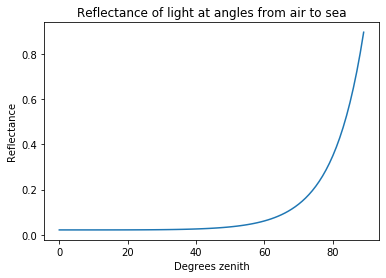

In [84]:
n_air=1.0
n_water=1.34

reflections=[]
degrees=[]
for theta_deg in range(0,90,1):
    reflections.append(fresnel(n_water/n_air,theta_deg,0))
    degrees.append(theta_deg)

plt.plot(degrees, reflections)
plt.title("Reflectance of light at angles from air to sea")
plt.ylabel("Reflectance")
plt.xlabel("Degrees zenith")
plt.show()

In [100]:
def calculate_alpha_dir(n_lambda,theta_deg):
    µ = np.cos(theta_deg) 
    a = np.sqrt(1.0 - (1.0 - µ**2)/n_lambda**2)
    b = ((a-n_lambda*µ)/(a+n_lambda*µ))**2    
    c = ((µ-n_lambda*a)/(µ+n_lambda*a))**2

    return 0.5*(b+c)

In [101]:
def whitecap(theta_deg, wind):
    # theta_deg = solar zenith angle
    # wind is wind at 10 m height to calculate whi
    µ = np.cos(theta_deg) 
    σ = np.sqrt(0.003+0.00512*wind)
    return (0.0152-1.7873*µ + 6.8972*(µ**2)-8.5778*(µ**3)+ 4.071*σ-7.6446*µ*σ) * np.exp(0.1643-7.8409*µ-3.5639*µ**2-2.3588*σ+10.054*µ*σ)

In [102]:
def diffuse_reflection(n_λ,σ):
    return -0.1479 + 0.1502*n_λ-0.0176*n_λ*σ

In [105]:
df=pd.read_csv("data/Wavelength/Fresnels_refraction.csv", header=0, sep=";", decimal=",")
print(df.head())
wavelengths=df["λ"]
refractions=df["n(λ)"]
theta_deg=10.0
wind=5.0

for λ, n_λ in zip(wavelengths,refractions):
    
    f_0 = calculate_alpha_dir(1.34,theta_deg)
    f_λ = calculate_alpha_dir(n_λ,theta_deg)
    R = f_λ - (whitecap(theta_deg, wind)*f_λ/f_0)
    
    print("Reflection {} wc {} n_λ {} f_λ {}".format(R,whitecap(theta_deg, wind),n_λ,f_λ)) 
    
    print("Diffuse reflection {}".format(diffuse_reflection(n_λ, np.cos(theta_deg))))
    

       λ      E(λ)  n(λ)  a '()λ   a *λ     b*λ  α-.λ
0  200.0  0.000054  1.45   0.775  3.070  0.1510   0.0
1  210.0  0.000206  1.44   0.752  1.990  0.1190   0.0
2  220.0  0.000349  1.42   0.730  1.310  0.0995   0.0
3  230.0  0.000384  1.41   0.708  0.928  0.0820   0.0
4  240.0  0.000292  1.40   0.685  0.718  0.0685   0.0
Reflection -51.39532200643015 wc 146.89885962962222 n_λ 1.45 f_λ 36.71888312940057
Diffuse reflection 0.09130310542203104
Reflection -53.49898838619575 wc 146.89885962962222 n_λ 1.44 f_λ 38.221826917401316
Diffuse reflection 0.08965342883291359
Reflection -58.160872662588105 wc 146.89885962962222 n_λ 1.42 f_λ 41.55246436114035
Diffuse reflection 0.0863540756546787
Reflection -60.74923622003424 wc 146.89885962962222 n_λ 1.41 f_λ 43.40169528823471
Diffuse reflection 0.08470439906556124
Reflection -63.53251806840507 wc 146.89885962962222 n_λ 1.4 f_λ 45.3901836742735
Diffuse reflection 0.08305472247644377
Reflection -63.53251806840507 wc 146.89885962962222 n_λ 1.4 f_λ 45.